# ***Installing Libraries***

In [1]:
!pip install featuretools 
!pip install autoviml --upgrade --ignore-installed
!pip install featurewiz

  Using cached autoviml-0.1.683-py3-none-any.whl (125 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Using cached nltk-3.6.3-py3-none-any.whl (1.5 MB)
  Using cached shap-0.39.0-cp37-cp37m-linux_x86_64.whl
  Using cached beautifulsoup4-4.10.0-py3-none-any.whl (97 kB)
  Using cached pandas-1.3.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached regex-2021.9.30-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (747 kB)
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
  Using cached xgboost-1.4.2-py3-none-manylinux2010_x86_64.whl (166.7 MB)
  Using cached emoji-1.5.0-py3-none-any.whl
  Using cached catboost-1.0.0-cp37-none-manylinux1_x86_64.whl

# ***Importing libraries***

In [2]:
import pandas as pd
import seaborn as sns

# ***Loading Dataset***

In [3]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# **Preparing Train and Target**

In [4]:
iris.dropna(inplace = True)
iris.reset_index(drop = True,inplace = True)

In [5]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()
y = iris['species'].copy()

# ***Feature Engineering using Feature Tools***

In [6]:
import featuretools as ft
#Setting the entity base
es = ft.EntitySet(id = 'model_iris')
es.entity_from_dataframe(entity_id = 'training', dataframe = X, make_index = True, index = 'index')
#Setting the ID based for feature engineering
es.normalize_entity(base_entity_id= 'training', new_entity_id= 'sepal_length', index= 'sepal_length')
es.normalize_entity(base_entity_id= 'training', new_entity_id= 'sepal_width', index= 'sepal_width')
es.normalize_entity(base_entity_id= 'training', new_entity_id= 'petal_length', index= 'petal_length')
es.normalize_entity(base_entity_id= 'training', new_entity_id= 'petal_length', index= 'petal_length')
#Deep Feature Synthetic
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity= 'training'
,agg_primitives= ['skew', 'count', 'std', 'mean', 'median', 'mode', 'max', 'min'],
trans_primitives = ['add_numeric', 'multiply_numeric'])
feature_matrix.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sepal_length                               150 non-null    float64
 1   sepal_width                                150 non-null    float64
 2   petal_length                               150 non-null    float64
 3   petal_width                                150 non-null    float64
 4   sepal_length.COUNT(training)               150 non-null    int64  
 5   sepal_length.MAX(training.petal_width)     150 non-null    float64
 6   sepal_length.MEAN(training.petal_width)    150 non-null    float64
 7   sepal_length.MEDIAN(training.petal_width)  150 non-null    float64
 8   sepal_length.MIN(training.petal_width)     150 non-null    float64
 9   sepal_length.MODE(training.petal_length)   150 non-null    float64
 10  sepal_length.MODE(training

/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entityset.py:266: UserWarning: Not adding duplicate relationship: <Relationship: training.petal_length -> petal_length.petal_length>
  "Not adding duplicate relationship: " + str(relationship))
/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/dfs.py:307: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['add_numeric', 'multiply_numeric']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


In [7]:
feature_matrix['species'] = y

# ***Auto-ViML***

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (150, 32)
    Training Set Memory Usage = 0.04 MB
Single_Label Target: ['species']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
      setosa:      50  ->   33.3%
  versicolor:      50  ->   33.3%
   virginica:      50  ->   33.3%
CAUTION: In Multi-Class Boosting (2+ classes), TRAINING WILL TAKE A LOT OF TIME!
String or Multi Class target: species transformed as follows: {'virginica': 0, 'setosa': 1, 'versicolor': 2}
Alert! Rare Class is not 1 but 0 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 150 rows, 31 cols
Too many columns to print
    Numeric Columns: ['s

2021-10-02 16:39:31.796470: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-02 16:39:31.796570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ab24856a6c95): /proc/driver/nvidia/version does not exist


        using 14 variables...
        using 11 variables...
        using 8 variables...
        using 5 variables...
        using 2 variables...
Found 16 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  135 , CV rows =  15
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
############### XGBoost M O D E L   B U I L D I N G  B E G I N S  ####################
Rows in Train data set = 135
  Features in Train data set = 16
    Rows in held-out data set = 15
Finding Best Model and Hyper Parameters for XGBoost model...
    Baseline Accuracy Needed for Model = 66.67%
    CPU Count = 2 in this device
Using XGBoost Model, Estimated Training time = 0.08 mins
[16:39:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost

Could not plot SHAP values since SHAP is not installed or could not import SHAP in this machine
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 21
Writing Output files to disk...
    Saving predictions to ./species/species_Multi_Classification_test_modified.csv
    Saving predictions to ./species/species_Multi_Classification_submission.csv
    Saving predictions to ./species/species_Multi_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 0.4 for the Entire Process


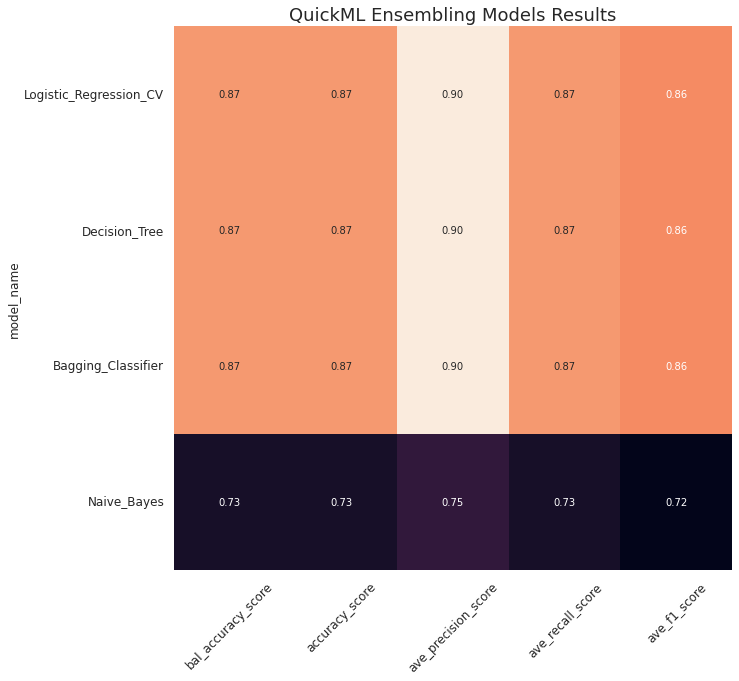

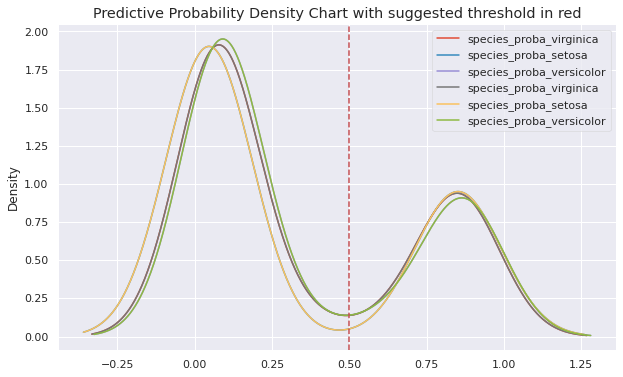

In [9]:
from autoviml.Auto_ViML import Auto_ViML
#Auto_ViML have 4 output (The best model, important feature, modified train data, modified test data
model, features, trainm, testm = Auto_ViML(
#We put our train data in the train and specify the target in the target parameter. As we do not have external test data and sample submission, we could leave it blank
train = feature_matrix,
target = "species",
test = "",
sample_submission = "",
#We set the hyperparameter search to RS (Randomized Search) for faster model creation. We set the scoring foxus to RMSE as this is regression case and boosting flag as False to using the Random Forest or True to use XGBoost Tree. We also use the feature reduction as True. 
hyper_param="RS",
feature_reduction=True,
scoring_parameter="RMSE",
Boosting_Flag=True,
verbose = 2)

In [10]:
model

CalibratedClassifierCV(base_estimator=OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                                                  booster='gbtree',
                                                                                  colsample_bylevel=None,
                                                                                  colsample_bynode=None,
                                                                                  colsample_bytree=None,
                                                                                  gamma=None,
                                                                                  gpu_id=None,
                                                                                  importance_type='gain',
                                                                                  interaction_constraints=None,
                                                                              

In [11]:
features

['petal_length.MEDIAN(training.petal_width)',
 'sepal_width.MEAN(training.petal_width)',
 'petal_length.STD(training.petal_width)',
 'petal_length.MODE(training.sepal_width)',
 'petal_length.COUNT(training)',
 'sepal_length.STD(training.petal_width)',
 'sepal_length.SKEW(training.petal_width)',
 'sepal_width.MODE(training.petal_length)',
 'sepal_width',
 'sepal_width.MODE(training.sepal_length)',
 'sepal_width.MAX(training.petal_width)',
 'petal_length.SKEW(training.petal_width)',
 'sepal_width.SKEW(training.petal_width)',
 'sepal_length.COUNT(training)',
 'sepal_width.COUNT(training)',
 'sepal_width.STD(training.petal_width)_Missing_Flag']

If we only need the Feature Selection capability of Auto-ViML without any modeling process, we could use another package developed by the Auto-ViML team called Featurewiz.


Featurewiz use two back-to-back methods to remove any unnecessary features. They are SULOV (Searching for Uncorrelated List of Variables) followed by the Recursive XGBoost method.

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (150, 32)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    31 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
GPU active on this device
    Running XGBoost using GPU parameters
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 31
#### Single_Label Multi_Classification Feature Selection Started ####
Searching for highly correlated variables from 31 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time...) ###

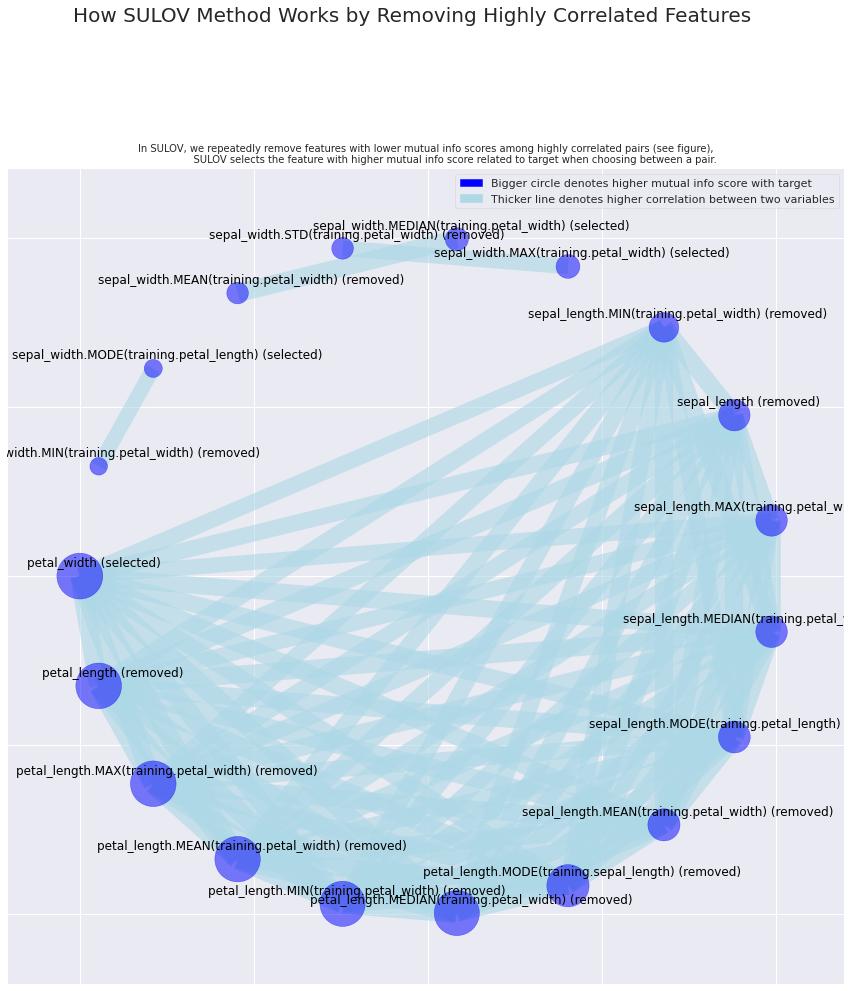

    Adding 0 categorical variables to reduced numeric variables  of 16
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 16 
    Finding Important Features using Boosted Trees algorithm...
        using 16 variables...
        using 13 variables...
        using 10 variables...
        using 7 variables...
        using 4 variables...
        using 1 variables...
Selected 14 important features from your dataset
    Time taken (in seconds) = 1
Returning list of 14 important features and dataframe.


In [13]:
#import the function
from featurewiz import featurewiz
features = featurewiz(
    #Set the dataset you want to do the feature selection
    dataname= feature_matrix,
    #Set the target column
    target = 'species',
    #Set threshold for removing variables, the threshold is based on   Pearson correlation
    corr_limit=0.7,
    verbose=2)